### 處理季節性問題：傅立葉變換與STL分解
references
- [處理季節性問題：傅立葉變換與STL分解](https://medium.com/r-%E8%AA%9E%E8%A8%80%E8%87%AA%E5%AD%B8%E7%B3%BB%E5%88%97/r%E8%AA%9E%E8%A8%80%E8%87%AA%E5%AD%B8%E6%97%A5%E8%A8%98-8-%E8%99%95%E7%90%86%E5%AD%A3%E7%AF%80%E6%80%A7%E5%95%8F%E9%A1%8C-%E5%82%85%E7%AB%8B%E8%91%89%E8%AE%8A%E6%8F%9B%E8%88%87stl%E5%88%86%E8%A7%A3-80ff3c56e142)

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import periodogram
from statsmodels.tsa.seasonal import STL, seasonal_decompose

### 季節性（Seasonality）
- 一筆時間序列資料可能存在一定或明顯的季節性
- 季節性可以理解為時間序列可能存在週期性變化

In [137]:
data = pd.read_csv('../../data/AAOI.csv')
data = data.rename(columns={col:col.lower() for col in data.columns})
data['date'] = data['date'].astype('datetime64[ns]')

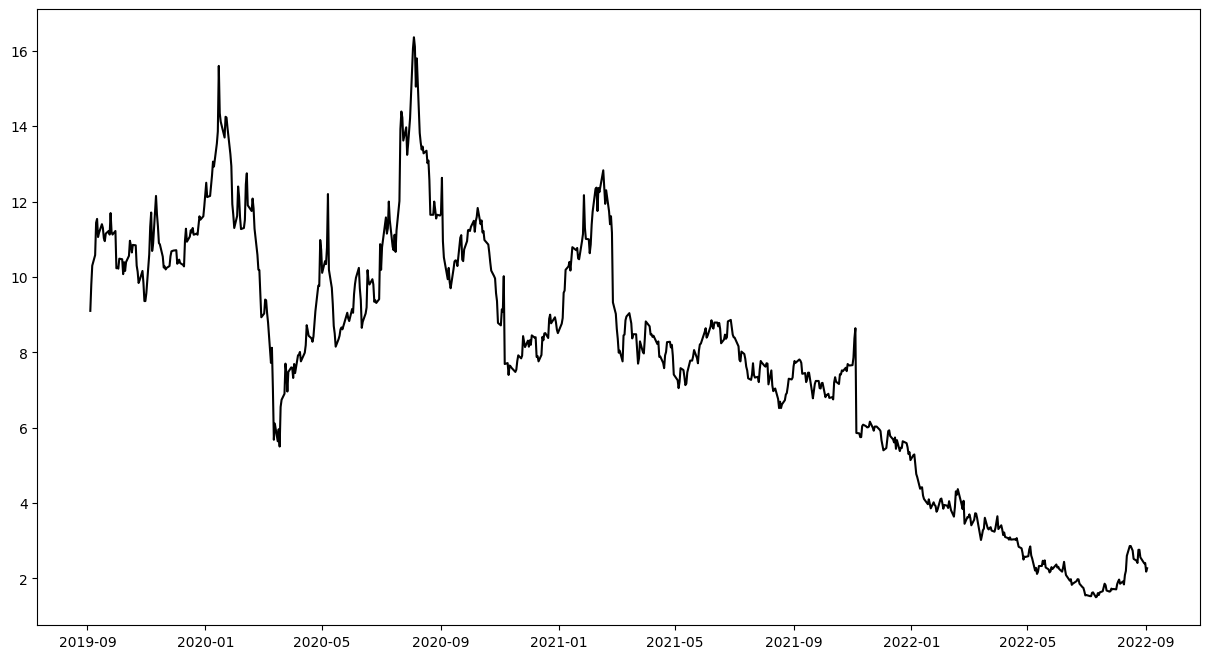

In [138]:
plt.figure(figsize=(15,8))
plt.plot(data['date'], data['close'], color='black')

### 檢驗季節性行為：傅裡葉裝換（Fourier Transform）
- 傅裡葉裝換主要應用於頻率資料的轉換。
- 在時間序列的處理上，可被應用於將時間序列視為一直頻率資料過程，以此來檢視其季節性與週期性。
    - 一般在轉換前，需要將時間序列轉換成成長率。

In [139]:
data['log'] = np.log(data['close'])

# 新增 一般成長率
data['growth'] = data['close'].diff() / data['close'].shift()

# 新增 對數成長率
data['growth_log'] = data['log'].diff()

data.head()

,date,open,high,low,close,adj close,volume,log,growth,growth_log
0,2019-09-04,8.86,9.39,8.855,9.10,9.10,550700,2.208274,NaN,NaN
1,2019-09-05,9.26,9.82,9.260,9.79,9.79,687200,2.281361,0.075824,0.073087
2,2019-09-06,9.80,10.30,9.750,10.30,10.30,697400,2.332144,0.052094,0.050782
3,2019-09-09,10.38,10.85,10.290,10.58,10.58,771800,2.358965,0.027184,0.026822
4,2019-09-10,10.51,11.60,10.510,11.44,11.44,935800,2.437116,0.081285,0.078151


Text(0.5, 0.98, 'Fig 1.1 Normal versus Log Growth Rate')

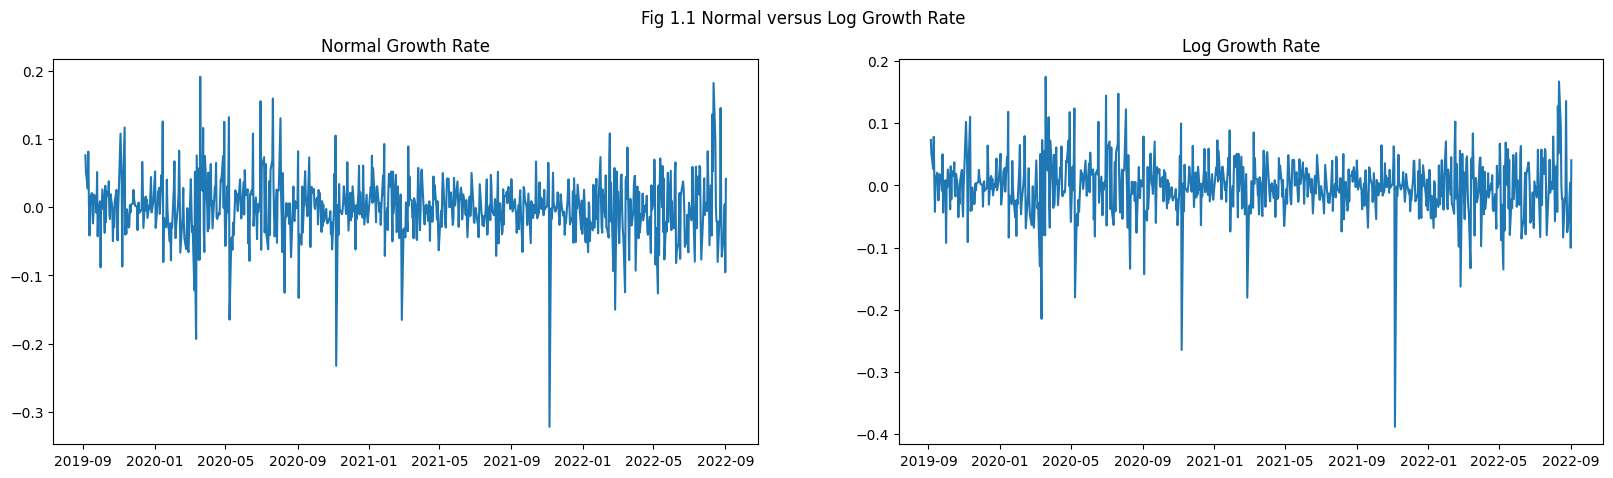

In [140]:
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.plot(data['date'], data['growth'])
plt.title('Normal Growth Rate')
plt.subplot(122)
plt.plot(data['date'], data['growth_log'])
plt.title('Log Growth Rate')
plt.suptitle('Fig 1.1 Normal versus Log Growth Rate')

/home/kenyo/anaconda3/envs/time-series-learn/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


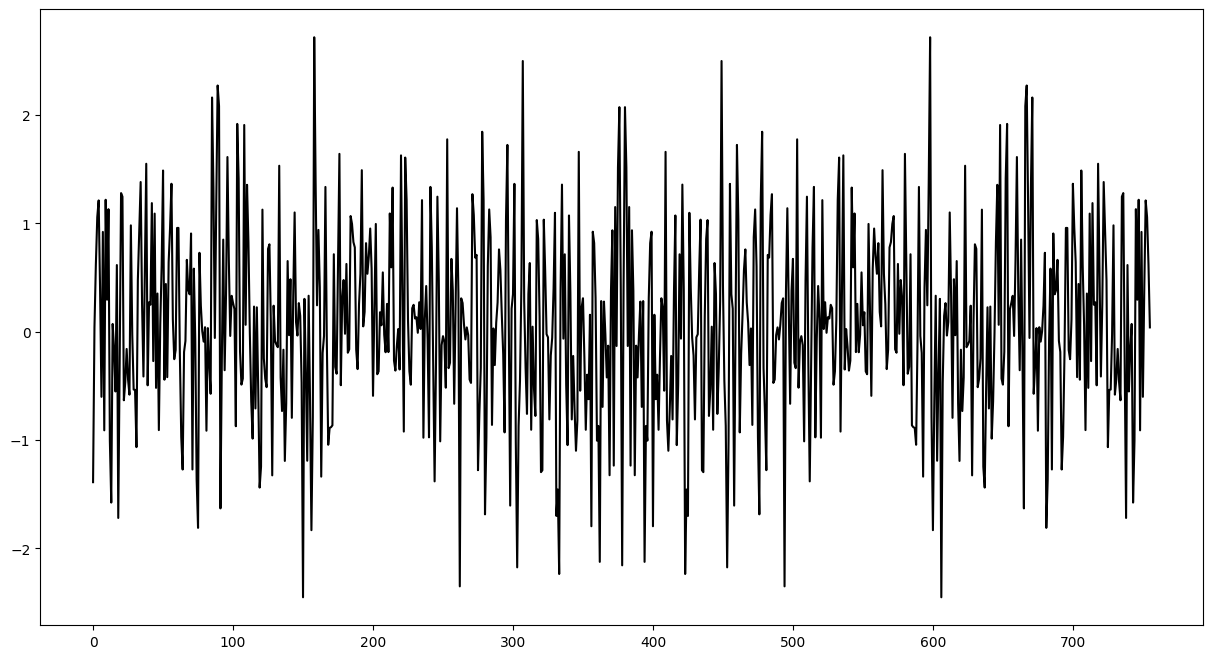

In [141]:
fft = np.fft.fft(data['growth_log'][1:])
plt.figure(figsize=(15,8))
plt.plot(fft, color='black')

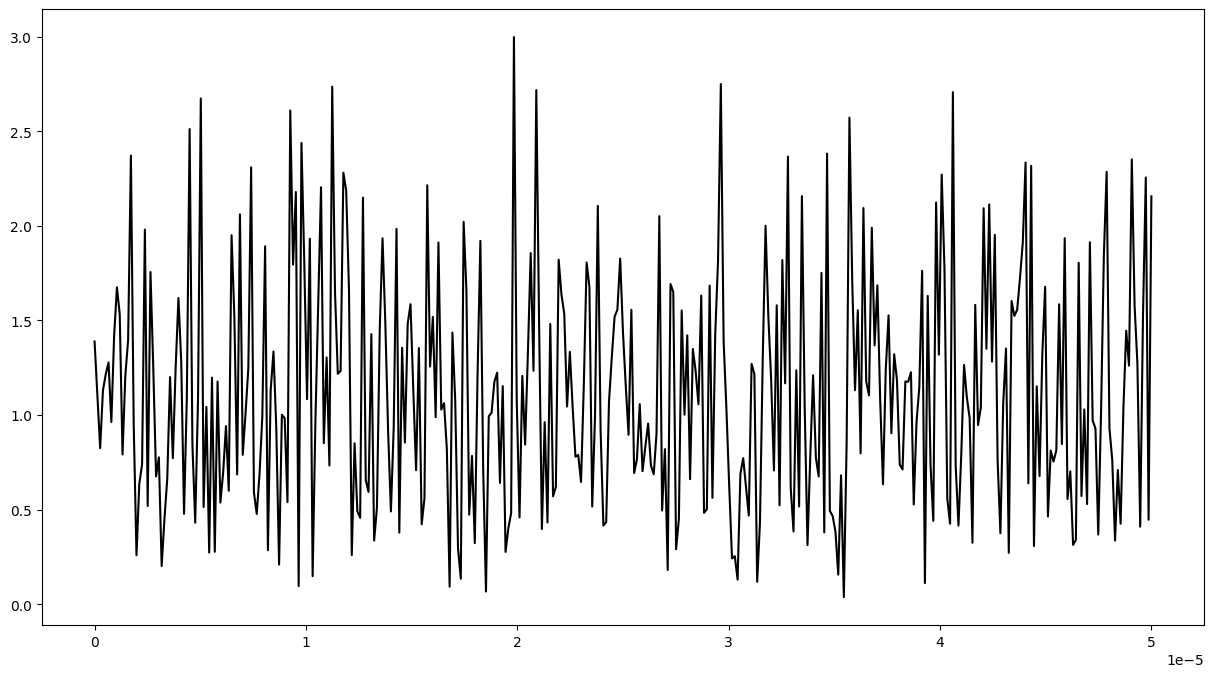

In [142]:
from scipy.fft import rfft, rfftfreq

X = np.array(data['growth_log'][1:])
n    = len(X)
yf   = rfft(X)
xf   = rfftfreq(n, 10e3)
plt.figure(figsize=(15,8))
plt.plot(xf, np.abs(yf), color='black')


### 檢驗季節性行為：STL分解（STL Decomposition）
- 全名：Seasonal and Trend decomposition using Loess
    - Loess 為局部回歸，簡單來說是對局部資料做回歸擬合
- STL分解的概念上是我們認為一筆時間序列的過程$Y$是可以被分解成季節性$S$、趨勢性$T$與隨機性$R$。
    - 加法：$Y_t = S_t + T_t + R_t$
- 也可透過 Moving Average 進行季節性$S$、趨勢性$T$與隨機性$R$的分解。
    - 加法：$Y_t = S_t + T_t + R_t$
    - 乘法：$Y_t = S_t * T_t * R_t$

In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

In [161]:
X = data['close']
X.index = np.array(data['date'])

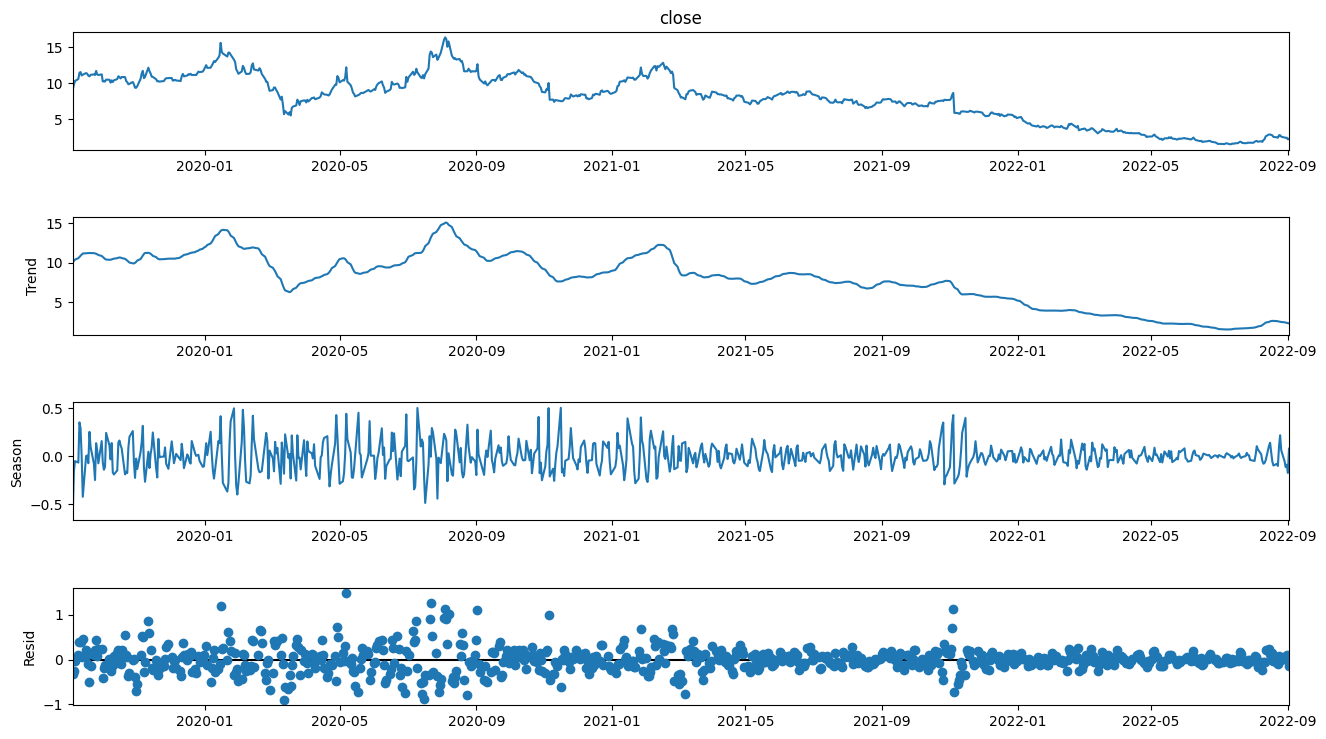

In [162]:
### 使用 LOESS 進行分解
stl = STL(X, period=7, )
res = stl.fit()
fig = res.plot()
fig.set_size_inches(15, 8)

<Figure size 640x480 with 0 Axes>

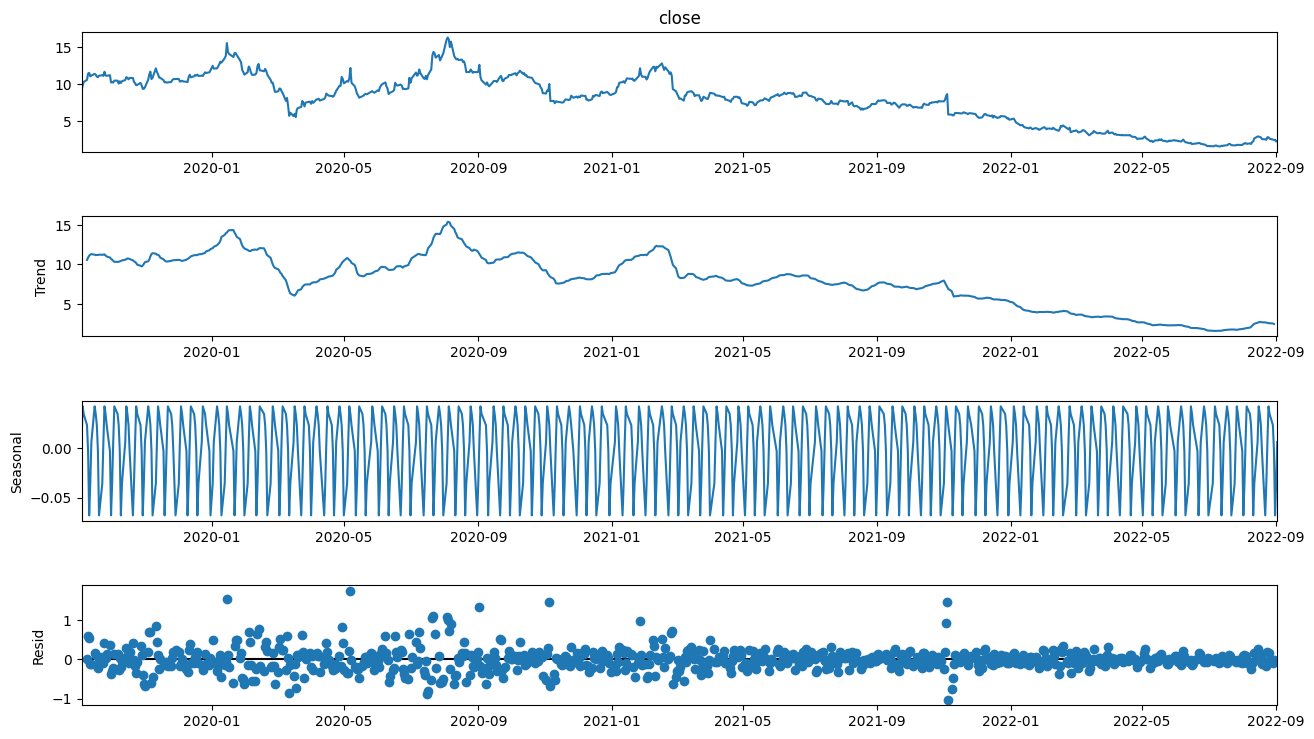

In [163]:
### 使用 Moving Average 進行分解
stl = seasonal_decompose(X, model='additive', period=7)
fig = plt.figure()  
fig = stl.plot()  
fig.set_size_inches(15, 8)